In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\svija\Documents\Data_Scientist\NAIVE BAYES ALGORITHM\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74098 stored elements and shape (5572, 8709)>

In [4]:
len(X.toarray())

5572

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.25)

In [6]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [7]:
pred = clf.predict(X_test)

In [8]:
cr = classification_report(pred, y_test)
print(cr)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1214
        spam       0.93      0.96      0.95       179

    accuracy                           0.99      1393
   macro avg       0.96      0.98      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [9]:
cm = confusion_matrix(pred, y_test)
print(cm)

[[1202   12]
 [   7  172]]


<Axes: >

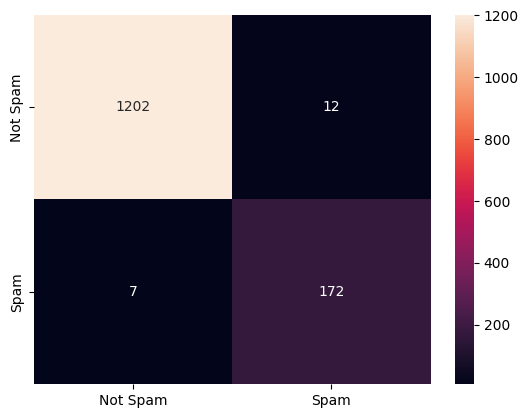

In [10]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])